## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

<div style="text-align: right"><i><font size="2"> by: <a href="https://www.linkedin.com/in/sonjoy-das-9b323213/" target="_parent">Sonjoy Das, PhD</a></font></i></div>

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

# For Non-negative matrix factoriztion(NMF)
from sklearn.decomposition import NMF

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [2]:
df = pd.read_csv('distance_dataset.csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [3]:
mat = df.values

matYZ = df[['Y', 'Z']].values

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [4]:
# simCosine3D = 1. - cosine_similarity(mat, [[5,5,5]], 'cosine')
# simCosine = 1. - cosine_similarity(matYZ, [[5,5]], 'cosine')
simCosine3D = 1. - cosine_similarity(mat, np.full(mat.shape, 5))
simCosine = 1. - cosine_similarity(matYZ, np.full(matYZ.shape, 5))

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

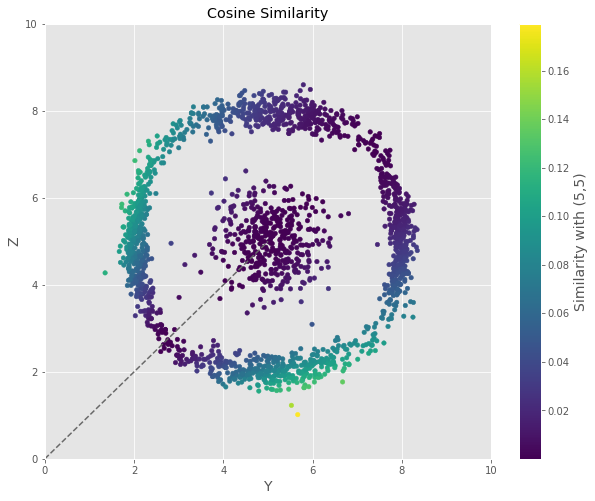

In [5]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
#plt.plot([0,3],[0,7.2], '--', color='dimgray')
#plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

**<font color='blue'>The plot illustrates that the points, that are closer to the point (5,5), are indeed color coded with low values, while the points father away from (5,5) are color coded with high values.</font>**

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

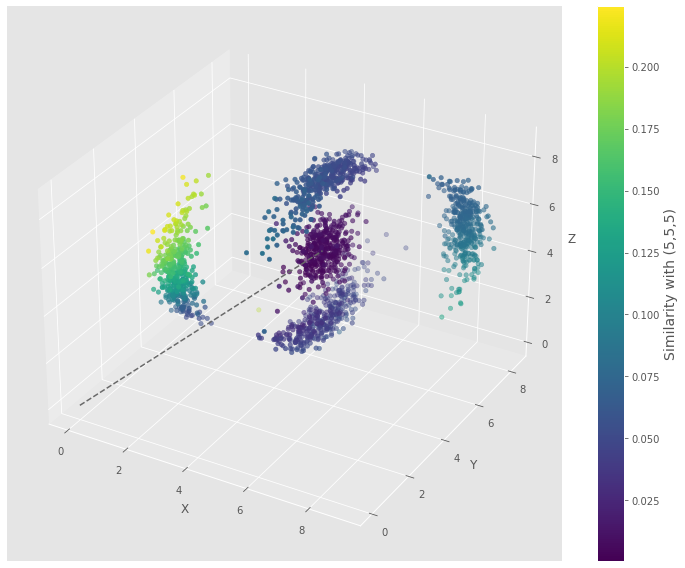

In [6]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(mat[:,0], mat[:,1], mat[:,2], c=simCosine3D[:,0])
ax.plot3D([0,5],[0,5], [0,5], '--', color='dimgray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

**<font color='blue'>We have again the similar conclusion from the above plot. The points, that are closer to the point (5,5,5), are indeed color coded with low values, while the points father away from (5,5,5) are color coded with high values.</font>**

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 1','Document 2'])

,coffee,essence,of,starbucks
Document 1,1,0,0,1
Document 2,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 1','Document 2'])

,coffee,essence,of,starbucks
Document 1,0.579739,0.000000,0.000000,0.814802
Document 2,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus.

In [9]:
print(trsfm[0:1])

  (0, 0)	0.5797386715376657
  (0, 3)	0.8148024746671689


In [10]:
print(trsfm)

  (0, 0)	0.5797386715376657
  (0, 3)	0.8148024746671689
  (1, 2)	0.6316672017376245
  (1, 1)	0.6316672017376245
  (1, 0)	0.4494364165239821


In [11]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

The first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

**<font color='blue'>The above simple illustration also shows drawbacks of the `cosine_similarity`. While both "Starbucks Coffee" and "Essence of Coffee" are essentially coffee shops, the similarity measure between them is only 0.26055576 which is very low indicating that the two documnets are not similar. What the two phrases (or documents) really imply is implicit and cannot simply be measured without incorporating other factors perceived by the human mind. </font>**

However, let's further see how at least the mathematical framework of `cosine_similarity` can still be useful for larger documents to extract some not-so-subtle and explicit information. Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Input the documents</font>**

In [12]:
Document1 = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

Document2 = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [13]:
corpus = [Document1,Document2]

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [14]:
X_train_counts = count_vect.fit_transform(corpus)

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [15]:
pd.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 1','Document 2'])

,after,became,by,claimed,do,election,friend,friends,had,he,...,support,the,though,to,trump,was,who,winning,witchhunt,with
Document 1,1,1,0,0,0,1,0,2,0,1,...,1,2,1,0,2,0,0,1,0,1
Document 2,0,0,1,1,1,2,1,0,2,2,...,0,2,0,1,1,1,1,0,1,1


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [16]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
samples = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 1','Document 2'])
samples

,after,became,by,claimed,do,election,friend,friends,had,he,...,support,the,though,to,trump,was,who,winning,witchhunt,with
Document 1,0.208007,0.208007,0.000000,0.000000,0.000000,0.147999,0.000000,0.416014,0.000000,0.147999,...,0.208007,0.295997,0.208007,0.000000,0.295997,0.000000,0.000000,0.208007,0.000000,0.147999
Document 2,0.000000,0.000000,0.163984,0.163984,0.163984,0.233353,0.163984,0.000000,0.327969,0.233353,...,0.000000,0.233353,0.000000,0.163984,0.116676,0.163984,0.163984,0.000000,0.163984,0.116676


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [17]:
# cosine_similarity(trsfm[0:1].toarray(), trsfm.toarray())
cosine_angle = cosine_similarity(trsfm[0,:].toarray(), trsfm[1,:].toarray())[0][0]
cosine_angle

0.36262628476533265

In [18]:
np.rad2deg(np.arccos(cosine_angle))

68.73842697261132

**<font color='blue'> The similarity measure between the two documents given by `cosine_similarity` is 0.36262628. In other words, the angle between two vectors associated with two documnets is 68.73 degree in the abstract space defined by all the words in the two documents. This value indicates that the two documents are not similar. However, careful reading of the two docments as perceived by human mind indicates that the messages of the two documents are very similar, both of which are essentiaslly saying that Trump considers Putin as his friend and Putin did not have any influence in US elcetion.</font>**

### Non-negative Matrix Factorization

In [19]:
model = NMF(init='random',random_state=0)
model.fit(samples)

NMF(init='random', random_state=0)

In [20]:
(model.n_components_,model.n_features_in_)

(36, 36)

In [21]:
nmf_features = model.transform(samples)
df_features = pd.DataFrame(nmf_features)
df_features

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.198482,1.005348,0.12453,0.000000,0.295417,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.036521,0.0,0.000000,0.0,0.0,0.00000,0.00000,0.0,0.000000,0.000000
1,0.705761,0.000000,0.00000,0.131082,0.000000,0.244222,0.337295,0.192342,0.000164,0.006619,...,0.000000,0.0,0.129106,0.0,0.0,0.04882,0.02642,0.0,0.142049,0.064982


In [22]:
# Check if sample 1 is reconstructed correctly
pd.DataFrame([trsfm.toarray()[0,:].round(decimals=3), ((model.components_.T * nmf_features[0,:]).T).sum(axis=0).round(decimals=3)])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.208,0.208,0.0,0.0,0.0,0.148,0.0,0.416,0.000,0.148,...,0.208,0.296,0.208,0.0,0.296,0.0,0.0,0.208,0.0,0.148
1,0.208,0.208,0.0,0.0,0.0,0.148,0.0,0.416,0.001,0.148,...,0.208,0.296,0.208,0.0,0.296,0.0,0.0,0.208,0.0,0.148


In [23]:
np.linalg.norm(trsfm.toarray()[0,:] - ((model.components_.T * nmf_features[0,:]).T).sum(axis=0))

0.0015895511846251834

In [24]:
# Check if sample 2 is reconstructed correctly
pd.DataFrame([trsfm.toarray()[1,:].round(decimals=3), ((model.components_.T * nmf_features[1,:]).T).sum(axis=0).round(decimals=3)])

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,0.164,0.164,0.164,0.233,0.164,0.0,0.328,0.233,...,0.0,0.233,0.0,0.164,0.117,0.164,0.164,0.0,0.164,0.117
1,0.0,0.0,0.164,0.164,0.164,0.233,0.164,0.0,0.328,0.233,...,0.0,0.233,0.0,0.164,0.117,0.164,0.164,0.0,0.164,0.117


In [25]:
np.linalg.norm(trsfm.toarray()[1,:] - ((model.components_.T * nmf_features[1,:]).T).sum(axis=0))

0.00045878262818813495

Yes, both the samples are reconstructed quite accurately!

In [26]:
# norm_features = normalize(nmf_features)
# df_features = pd.DataFrame(norm_features)
# df_features

In [27]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in degrees between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            90
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            180
            >>> angle_between((np.cos(22.5*np.pi/180), np.sin(22.5*np.pi/180), 0), (-1, 0, 0))
            157.5
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.rad2deg(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

features_angle = angle_between(nmf_features[0,:], nmf_features[1,:]).round(decimals=2)

print(f"The angle between the nmf_features vectors of the two documents is {features_angle} degree.")

The angle between the nmf_features vectors of the two documents is 83.52 degree.


In [28]:
# Just checking
np.rad2deg(np.arccos(cosine_similarity([nmf_features[0,:]], [nmf_features[1,:]])))[0][0].round(decimals=2)

83.52

**<font color='blue'> This shows that the two `nmf_features` vectors are almost perpendicular to each other in the abstract 36-dimensional space defined by `model.components_`. In this space, the `nmf_features` can be considered to be the coordinates.  Therefore, the two documents can be considered quite dissimilar. But, as indicated earlier, this measure also cannot capture the other factors perceived by human mind and wrongly infer that the underlying messages of the two documents are very different. </font>**